In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 
from torch.utils.data import DataLoader 
import torchvision.datasets as datasets 
import torchvision.transforms as transforms 

In [4]:
# Hyperparameters
in_channel = 1
num_classes = 10 
learning_rate = 0.001
batch_size = 64
num_epochs = 5

# Load Data
train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [25]:
items = next(iter(train_loader))
image, label = items

In [26]:
image.shape

torch.Size([64, 1, 28, 28])

In [20]:
def show_transformed_image(image):
   # np_image = image.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(np_image, (1, 2, 0)))
    #plt.imshow(image)

labels: tensor([2, 8, 9, 7, 7, 7, 2, 2, 2, 0, 3, 0, 2, 6, 2, 4, 6, 8, 9, 3, 5, 2, 0, 1,
        1, 4, 1, 8, 4, 9, 4, 4, 3, 5, 2, 6, 8, 5, 7, 5, 7, 3, 1, 3, 0, 9, 8, 7,
        3, 9, 4, 7, 3, 1, 1, 8, 4, 3, 1, 8, 3, 9, 8, 4])


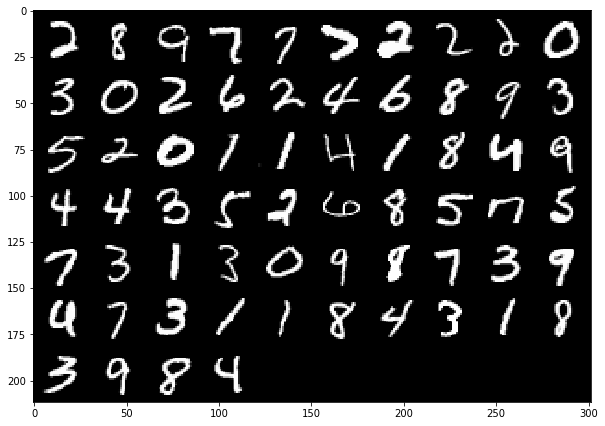

In [32]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np

grid = make_grid(image, nrow = 10)

plt.figure(figsize=(10,10))
plt.imshow(np.transpose(grid, (1, 2, 0)))

print('labels:', label)

In [2]:
# Simple CNN
class CNN(nn.Module):
    def __init__(self, num_classes = 10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.pool = nn.MaxPool2d(kernel_size=(2,2), stride = (2,2))
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(16*7*7, num_classes)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        
        return x

In [34]:
from torch.optim import Adam
cnn_model = CNN()
optimizer = Adam(cnn_model.parameters())
loss_fn = nn.CrossEntropyLoss()

In [35]:
def train_and_build(num_epochs):
    for epoch in range(num_epochs):
        cnn_model.train()
        for i, (images, labels) in enumerate(train_loader):
            
            labels = labels.long()
            optimizer.zero_grad()
            outputs = cnn_model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

In [36]:
train_and_build(2)

In [38]:
##evaluate model
import torch

cnn_model.eval()
test_acc_count = 0
for k, (test_images, test_labels) in enumerate(test_loader):
    test_outputs = cnn_model(test_images)
    _, prediction = torch.max(test_outputs.data, 1)
    test_acc_count += torch.sum(prediction == test_labels.data).item()

test_accuracy = test_acc_count / len(test_loader)

print(test_accuracy)

62.267515923566876


Testing model visually

In [60]:
items_test = next(iter(test_loader))
image_test, label_test = items_test

In [72]:
from PIL import Image

transformations = transforms.Compose([
    transforms.ToTensor()
])


test_image = Image.open("/Users/rhyschua/Desktop/Capstone Project/Practice/Data/mnistasjpg/testSet/testSet/img_100.jpg")
test_image_tensor = transformations(test_image).float()
test_image_tensor = test_image_tensor.unsqueeze_(1)
output = cnn_model(test_image_tensor)
class_index = output.data.numpy().argmax()

In [50]:
class_index

4

In [51]:
def show_image(path):
    img = Image.open(path)
    img_arr = np.array(img)
    plt.figure(figsize=(5,5))
    plt.imshow(img_arr)

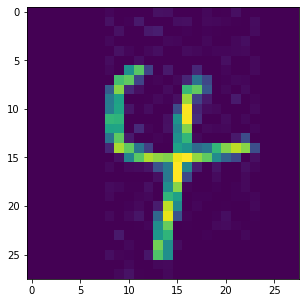

In [52]:
show_image("/Users/rhyschua/Desktop/Capstone Project/Practice/Data/mnistasjpg/testSet/testSet/img_100.jpg")